<a href="https://colab.research.google.com/github/Avit-hodibu/Artificial-Neural-Network-/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning

It is subfield of AI and ML that is inspired by the structure of a human brain.

DL algo attempt to draw similar conclusions as humans would by continually analyzing data with a given logical structure called Neural Network.

Perceptron is connected with each other with arrow which we call weight.

In one stright line vertically perceptron is placed is called layer. First layer is called input layer and last layer is output layer and in the middle all layer is hidden layer.  

DL is part of a broader family of ML methods based on ANN with representation learning.

DL algo uses multiple layers to progressively extract higher-level features from the raw input. For example, in image processing, lower layers may identify edges, while higher layers may identify the concepts relevant to a human such as digits or letters or faces.

CNN = image data

RNN = text/speech data

GAN = to generate things (text/image)

Why DL ?
- applicablity
- performance

DL vs ML
- data dependency: DL need more data
- hardware dependency: DL need GPU
- training time: training time is high. prediction time fast in DL
- feature selection: DL automaticly extract features behind the scene
- interpretablity: Since Dl work behind the scene like black box, you will not know why something is happen or predicted the actual reason.

Architectures of DL:

Image classification = ResNET

Text classification = BERT

Image segment = Unet

image translation = Pix2Pix

object detection = YOLO

speech generation = WaveNET

# Neural Networks

Types of NN:
1.  Multi-layer perception: multiple perception are arrange in layers. can be use in any problem, especially in supervised problem in nonlinear
2. CNN(convolutional NN): It NN where aleast one layer is convolution layer.
3. RNN(Recurrent NN): other previous are feed forward NN but, in RNN, in layer of hidden it feed backward aleast once and goes to hidden layer. It has variation name LSTM. These are use mainly in NLP
4. Auto encoders: you have the input data which you want to compress without lossing the quality. In this input layer and output layer have similar nodes but hidden  layer has less nodes.
5. Generative Adverserial Networks(GAN):
there is generator and discriminator. Generator generate the data and send to discriminator to check. Once the generator create a data that discriminator cannot identify whether it is real or fake, it is sucessfula and called auto generated data.

**History of DL**

 perception works on linear function. XOR canot able to solve

 paper= learning representations using backpropogating errors. if use bunch of perception it will converse the non-linear function also. If you add many hidden layer you can converse to any mathamatical function.




**Application**

self driving cars(CNN)

game playing agents

Virtual assistant(RNN)

Image colorlization:

Adding audio in mute video

Image caption generation

Text translation

Pixel Restroation

object detection

Deep dreaming

# Perceptron

It is algorithm. It is used for supervised ML. It has design in a way which become the building block of DL

https://www.sharpsightlabs.com/wp-content/uploads/2023/07/perceptrons-explained_FEATURED-IMAGE.png

It is a mathamatical function.

b = bias , w = weight, x= input

connector has tha weight and bias and is sum at sumation then it is called z and the z travel to activation function(f). The work of f is to make sure that z comes under certain range.

z = w1x1 + w2x2 + b

**Training**:
we train with data in perceptron. we train the value of bias and weight by using X and y. W and b adjust according to the value of X to get y

**Prediction**:
we put value of x input. it will calculate and give z value. the z value is give to activation function and give the output y.



more weight means it impact more.

**Geometric Intuition**:
sumation give z= w1x1+w2x2+b

x1 and x2 is input value. w1 and w2 and weight of input. b is bias.

lets replace x1 with x, x2 with y, w1 with A, w2 with B and b with C. Then,

z= Ax+By+C --- this is equation of line.

This means perceptron is line

Y = f(z) = 1 if z>=0 and 0 if z<0.

Ax+By+C>=0

Ax+By+C<0

these are region.

This means perceptron is line that create two region.  This why perceptron is a binary classifier.

When we have 3 input then it work as plane. It still create 2 region. more than 2 is called hyperplane.

So, if we have non-linear dataset then perceptron will fail.

In [ ]:
# code
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("placement.csv")

In [ ]:
print(df.shape)
df.head()

(100, 3)


,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

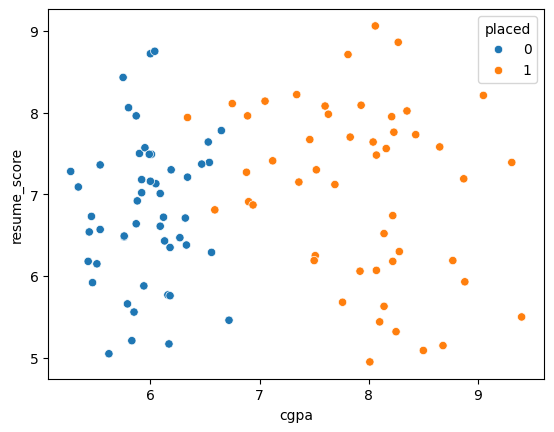

In [ ]:
sns.scatterplot(x='cgpa', y='resume_score', hue='placed', data=df)

In [ ]:
from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(df[['cgpa', 'resume_score']], df['placed'])

Perceptron()

In [ ]:
p.coef_

array([[ 40.26, -36.  ]])

In [ ]:
p.intercept_

array([-25.])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

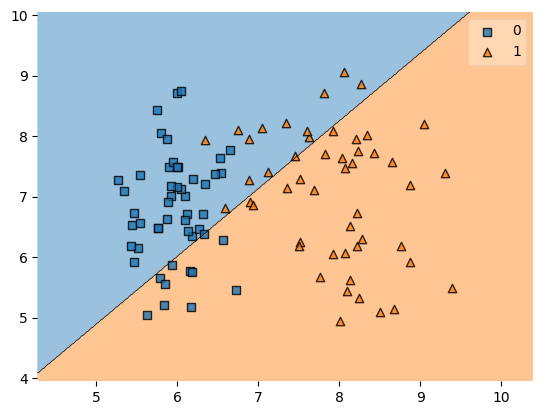

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(df[['cgpa', 'resume_score']].values, df['placed'].values, clf=p)

## Percepton Trick

Ax1 + Bx2 + C = 0 general equation of line

Our objective is find the value of A, B and C that can perfectly seperated the region

we initailized the line. we use loop in which we select randomly one point. Ask that point, are you correctly classified? if not then we change the line and make it correctly classified. again we repeat the process.

 you can use number of epoch or number of converge

How to label the regions?

Ax1+Bx2+C > 0 then positive region. Ax1+Bx2+C < 0 then negative region. if Ax1+Bx2+C = 0 then line.

**Transformations:**
if only C value change it is parallel move up and down with previous line.

if only A value change it is rotate keeping y axis same put change in x-axis.

if only B value change it is rotate keeping x axis same put change in y-axis.

we use learning rate for transformation.

new coef = previous coef - lr * coordinate  

what we do is Ax1+Bx2+C=0 and point is (x,y) then for new line:

A, B and C is coefficent and x, y is cordinate. 3 number is coefficent and 2 number is coordinate that means we canot subtract. So, we add another number to coordinate that is 1 then

coeff A B C

-coor x y 1 * lr

this gives new coeff

if you want to move line to negative direction than we add new coef = previous coef + lr * coordinate

and if we want to move to postive direction we sub

new coef = previous coef - lr * coordinate

**Algorithm**

Ax + By + C = 0

C + Ax + By = 0

w0 + w1x1 + w2x2 = 0 , then w0=C, w1=A, w2=B

we also add imaginary column x0 which has value 1 for all. This is for bias. then it will be

w0x0 + w1x1 + w2x2 = 0

sumation E i=0 to n-dim wixi = 0,  where n-dim is number of dimension.  

we do is matrix multiplaction W * X


epoch = n, lr=0.01

for i in range(epochs):

  if xi E N and E i=0 to n-dim wixi >= 0(postive)

    wnew = wold - lr * xi

  if xi E P and E i=0 to n-dim wixi < 0 (negative)

    wnew = wold + lr * xi

  if xi E N and E i=0 to n-dim wixi < 0 || if xi E P and E i=0 to n-dim wixi >= 0

    no change  

**Actual algorithm**

for i to rang(n-epoch):

select a random data(i)

Wn = W0 + lr (Yi - Yi hat) Xi

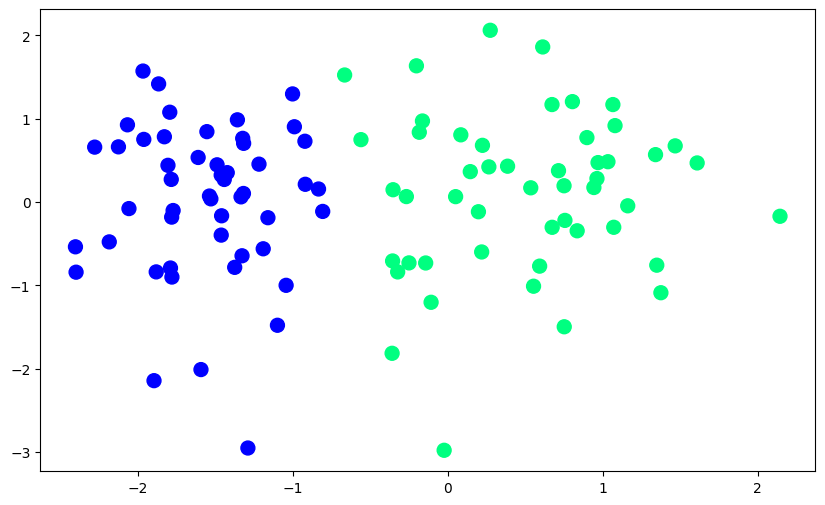

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [ ]:
def step(z):
  return 1 if z>0 else 0

In [ ]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1) # adding 1 to index 0 for bias
    weights = np.ones(X.shape[1]) # initializing weight value 1
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights)) # step do when greater than zero then give 1 and smaller than zero give 0
        weights = weights + lr*(y[j]-y_hat)*X[j] # update weight

    return weights[0],weights[1:]

In [ ]:
intercept_,coef_ = perceptron(X,y)

In [ ]:
print("weight:",coef_)
print("intercept:",intercept_)

weight: [1.30549088 0.09529354]
intercept: 1.0


for line in graph

Ax + By + C = 0 change to y = mx + b

m= -A/B , c= -C/B


In [ ]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [ ]:
x_input = np.linspace(-3,3,100) # create 100 number from -3 to 3
y_input = m*x_input + b

(-3.0, 2.0)

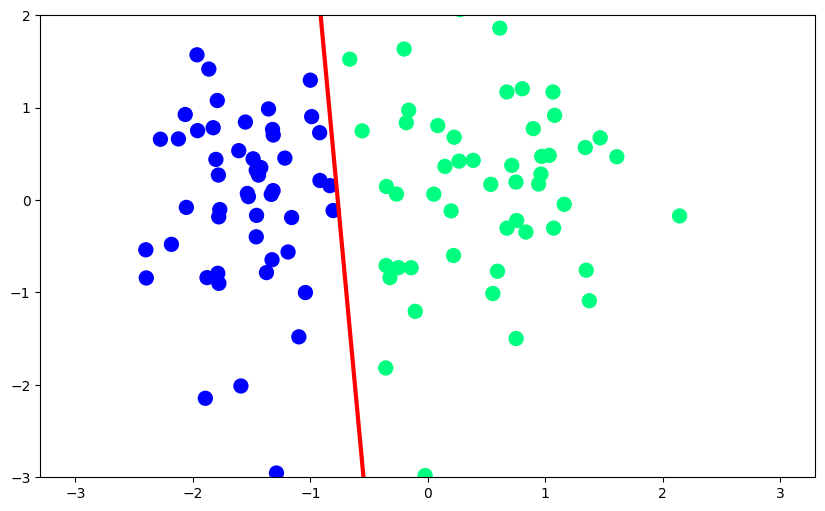

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

## Perceptron Loss Function

**Problem with Perceptron Trick**

line made from w1, w2 and b we cannot be confident that this is the best line we can draw.

The way it classify we are not quantify which is the best line to seperate.

there are be problem in converge. each time we select we only select correct point that mean no changes in line. what if incorrect classified line never select.

**To solve problem of perceptron trick we use loss function**

because of loss function we can quantify how much better the result is.

**loss function** it is a way to tell how much well ML working.

Loss function can be calculate by the distance perpendicular to the line of all errrors.

Although in perceptron, loss function calculated is not by the distance.
we put value of error datas in the equation of the line and the value it give is loss function. if the value comes negative then we make positive. It is directly proportional to the distance.

loss function=sum of error data |Ax+By+C|

loss function L(w1,w2,b) = (1/n E i=1 to n L(Yi, f(Xi))) + alpha R(w1,w2)

R= regulatization

when regulatization is not use we can ignore it.

L(Yi, f(Xi))=max(0, -Yi f(Xi)), where f(Xi) = w1x1+w2x2+b

this is the loss function

loss function L(w1,w2,b) = (1/n E i=1 to n max(0, -Yi f(Xi)))

n = number of rows in data

L= argmin w1,w2,b (1/n E i=1 to n max(0, -Yi f(Xi)))

we need to find the value of w1, w2, b by which we can get minimum value of L. so, to find this we used gradinet descent.

**Explanation of Loss Function**

loss function L(w1,w2,b) = (1/n E i=1 to n max(0, -Yi f(Xi))) , where f(Xi) = w1x1+w2x2+b

Lets break:

max(0, -Yi f(Xi)), let's say -Yi f(Xi) be X then if value of X>=0 then it give X as answer and if it less than 0 then 0 is the answer

lets say we only have 2 points then n = 2:,

L= 1/2 [max(0, -Y1 f(X1)) + max(0, -Y2 f(X2)) ]

i) when Yi = 1 and Yi hat =1 then

f(X1)= w1x1 +w2x2 +b>=0 this means it is positive (+ve value)

max(0, -Y1 f(X1))= max(0, -1 * (+ve))

this means: -*+ = -

max(0, -ve) = 0

ii) Yi = -1 and Yi hat =-1 then

f(X1)= w1x1 +w2x2 +b<0 this means it is positive (-ve value)

max(0, -Y1 f(X1))= max(0, - (-1) * (-ve))

this means: -*- *+ = -

max(0, -ve) = 0

iii)Yi = 1 and Yi hat =-1 then

f(X1)= w1x1 +w2x2 +b<0 this means it is positive (-ve value)

max(0, -Y1 f(X1))= max(0, - (1) * (-ve))

this means: - *- = +

max(0, +ve) = +ve

iv) Yi = -1 and Yi hat = 1 then

f(X1)= w1x1 +w2x2 +b>=0 this means it is positive (+ve value)

max(0, -Y1 f(X1))= max(0, - (-1) * (ve))

this means: - *- = +

max(0, +ve) = +ve


This show that when it is correctely classifed then it have 0 contribution. If noly misclassified we do calcuation of loss function










**Gradient Descent**

L= argmin w1,w2,b (1/n E i=1 to n max(0, -Yi f(Xi)))

we need to find the value of w1, w2, b

where f(Xi) = w1x1+w2x2+b

for i in epochs:

  w1 = w1 - lr dL/dw1

  w1 = w2 - lr dL/dw2

  b = b - lr dL/b


we need to find [dL/dw1, dL/dw2, dL/db]

dL/dw1 = dL/ df(xi) * df(xi)/dw1

df(xi)/dw1= (w1x1+w2x2+b)/dw1 = xi1

dL/ df(xi) = [0 if yif(xi)>=0 or -yi if yif(xi)<0]

this gives:

dL/dw1 = [0 if yif(xi)>=0 or -yi xi1 if yif(xi)<0]

Going by same logic:

dL/dw2 = [0 if yif(xi)>=0 or -yi xi2 if yif(xi)<0]

dL/db = [0 if yif(xi)>=0 or -yi if yif(xi)<0]

**code**


In [ ]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

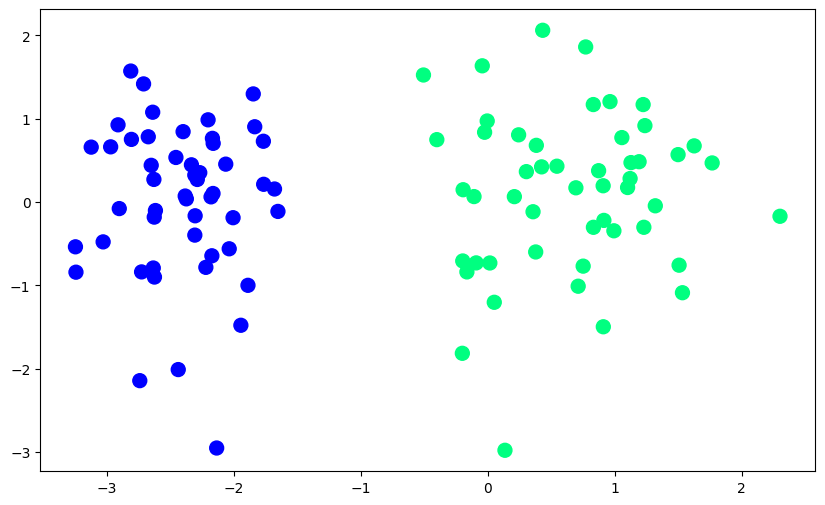

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [ ]:
def perceptron(X,y):

    w1=w2=b=1 # intial by 1
    lr = 0.1

    for j in range(1000):

        for i in range(X.shape[0]):

            # check condition
            z = w1*X[i][0] + w2*X[i][1] + b

            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]

    return w1,w2,b

In [ ]:
w1,w2,b = perceptron(X,y)

In [ ]:
w1, w2, b

(1.006638570722407, 0.22215119727529098, 1.3000000000000003)

In [ ]:
m = -(w1/w2)
c = -(b/w2)

print(m,c)

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

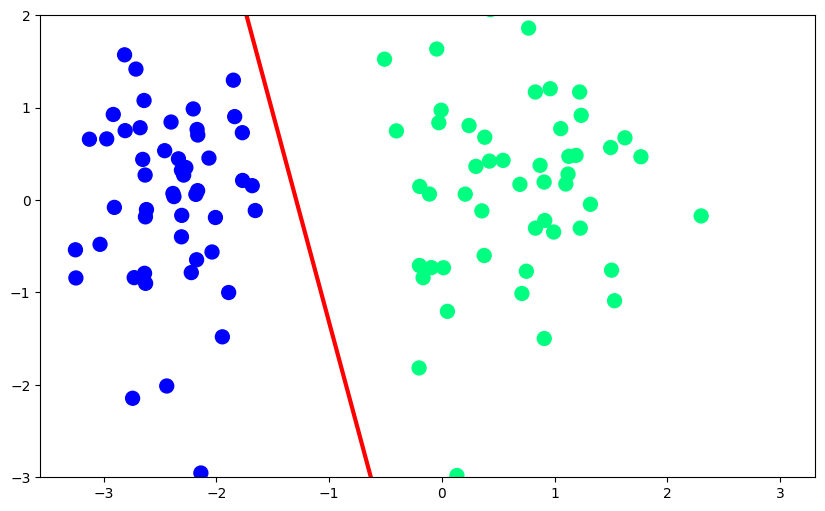

In [ ]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

For more loss function

if we want activation funtion to be proba then we can use sigmod function and we can use binary cross entropy as loss funtion.

L= -Yi logYi hat  + (1-Yi) log(1-Yi hat)

SDG = output proba


if we want to have multi-class then we can use activation funcation as softmax and loss fun = categorical cross entropy

this is softmax regression

Perceptron is flexiable


loss function | activation | output

hinge loss-> step -> perceptron ( binary classfication )

log-loss(binary cross entropy) -> sigmoid -> logistic regression (binary classifier)

categorical cross-entropy -> softmax -> softmax-regression (multiclass classifier)

mse -> linear -> linear reg(number)

**Probem**
perceptron canot work with non linear data

# Multi layer perceptron

we need to make an algorithm by which we can slove non-linear. For that we need to do multi-layer perceptron.

In sigmoid function, the proba p(Y) > p(N) increase as it goes farther from the line in postive side and vice-versa.

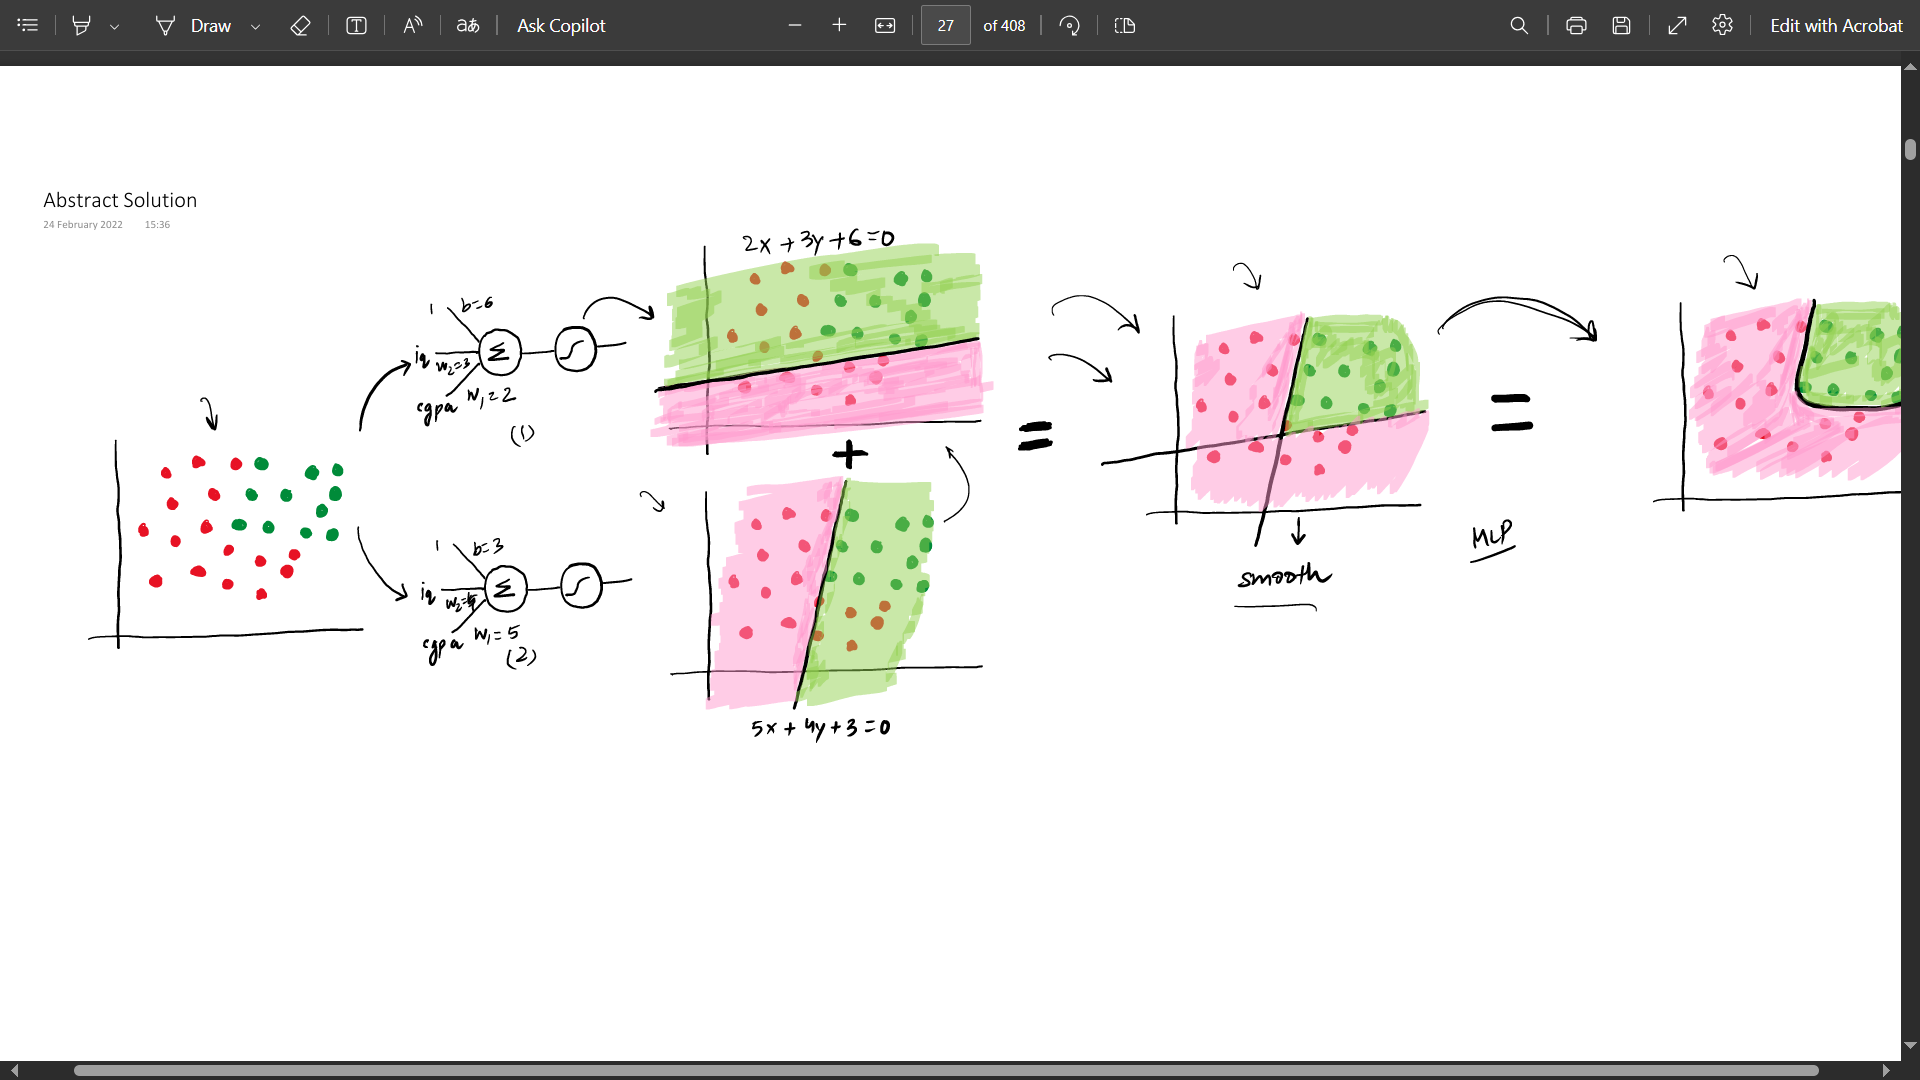

Two perceptron give two different result and after combining both it give good result.

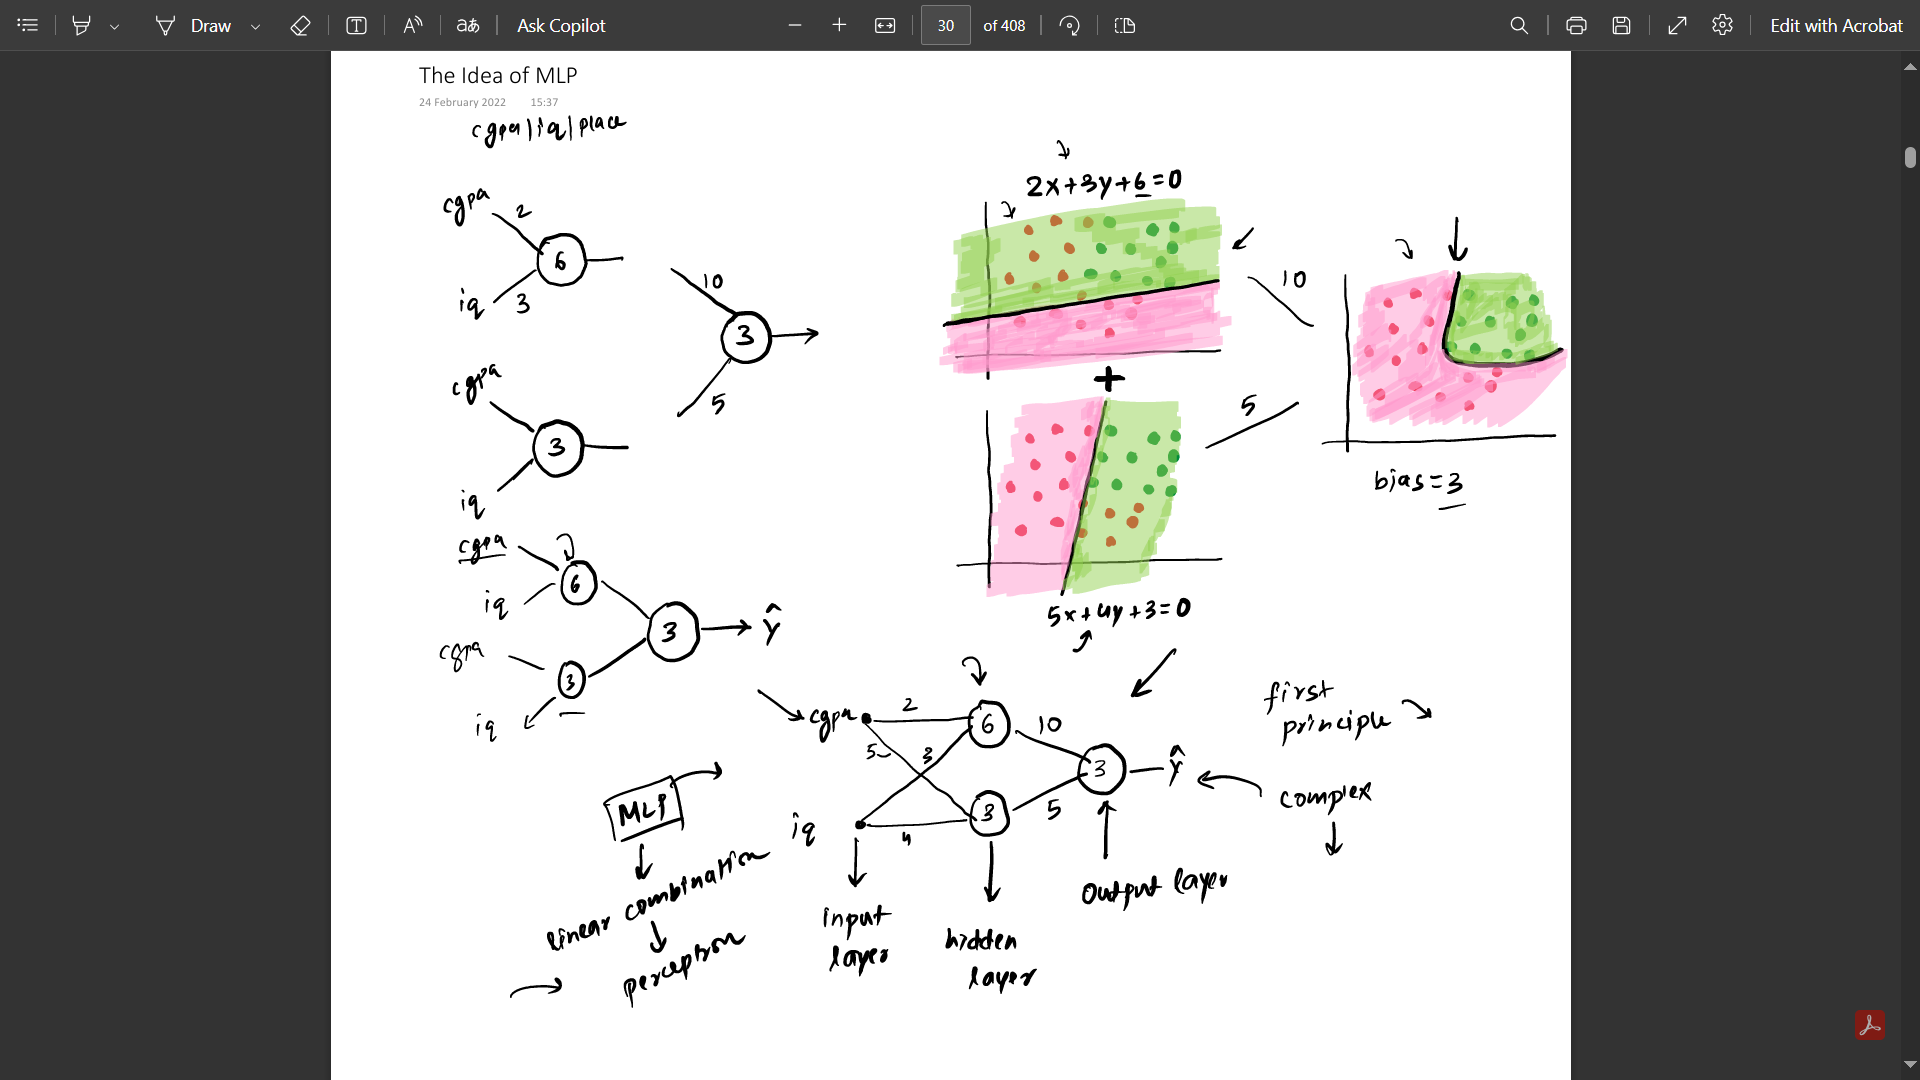

Impact depend upon weight assign.

Here we are making 3 perceptron combination. first layer have 2 perceptron which combine in 1 perceptron abd finally give output

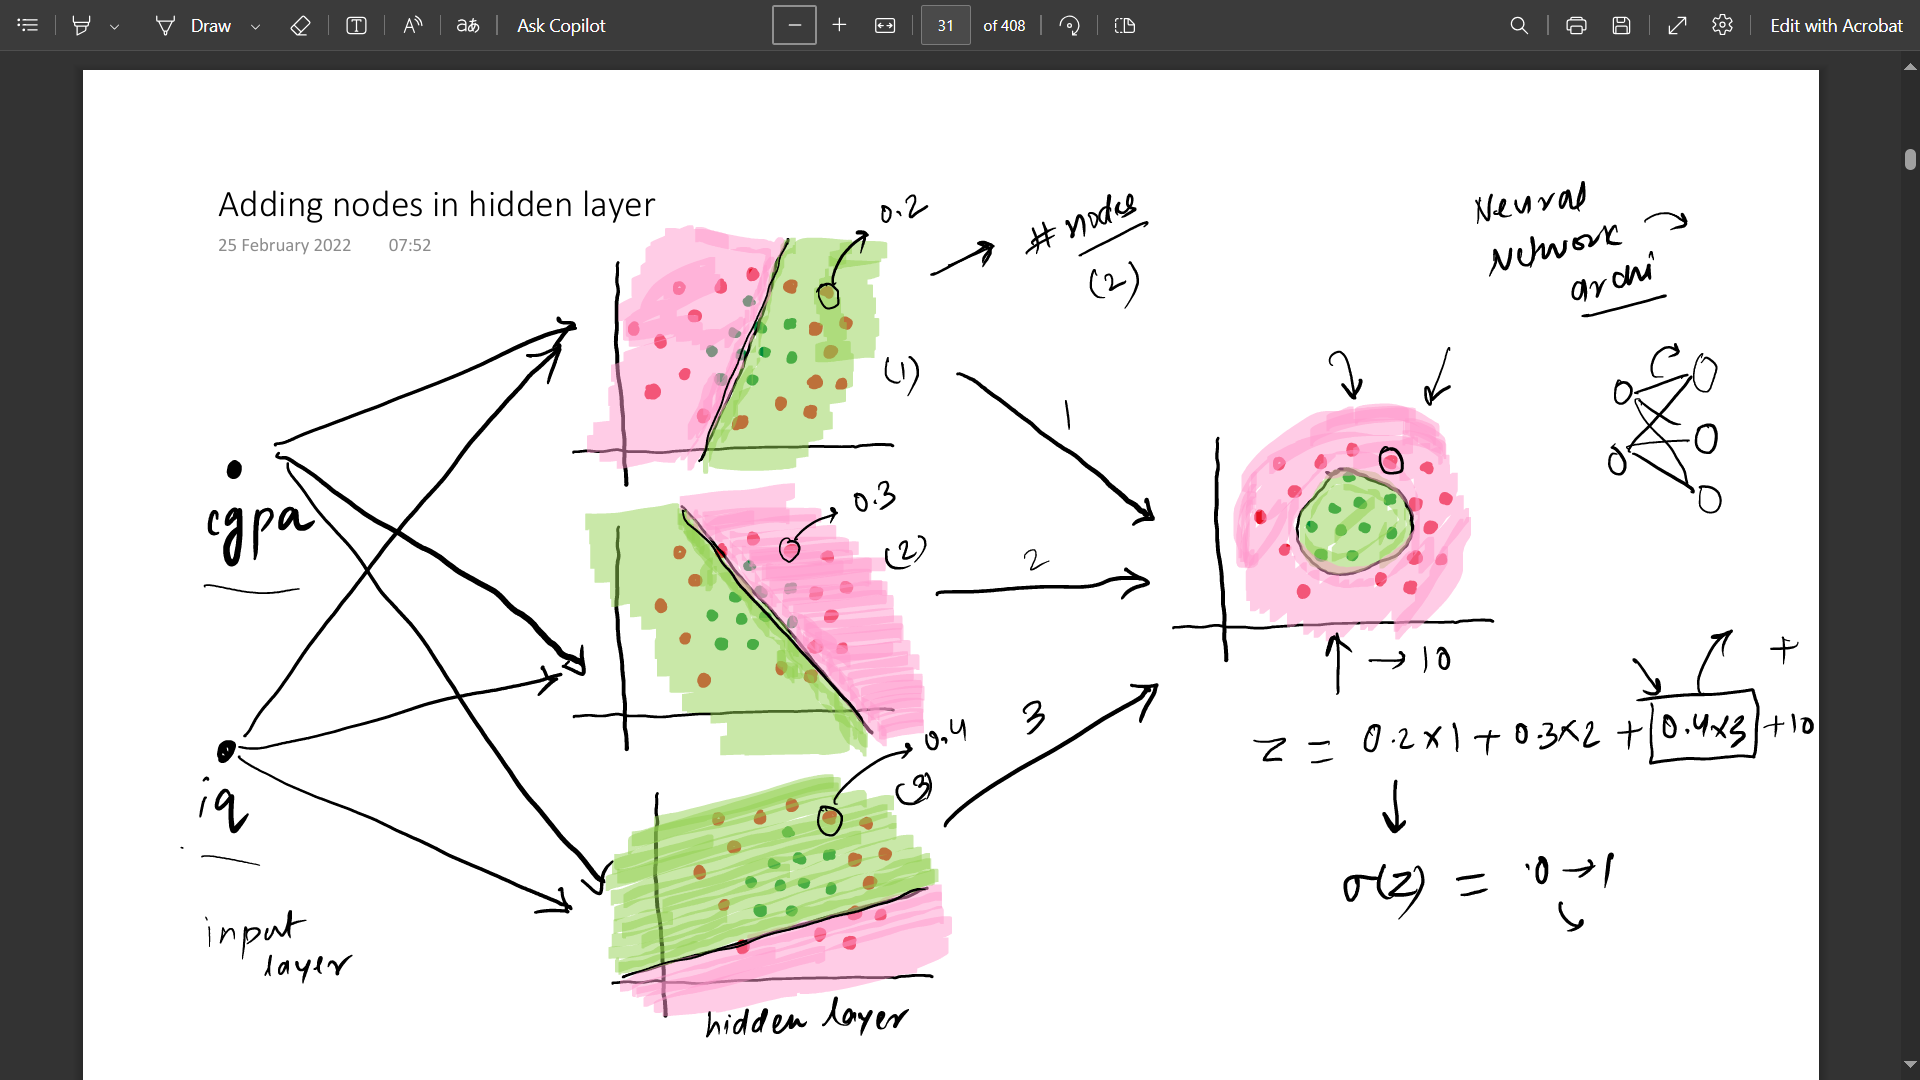

more node you add, you can solve more complex problem.

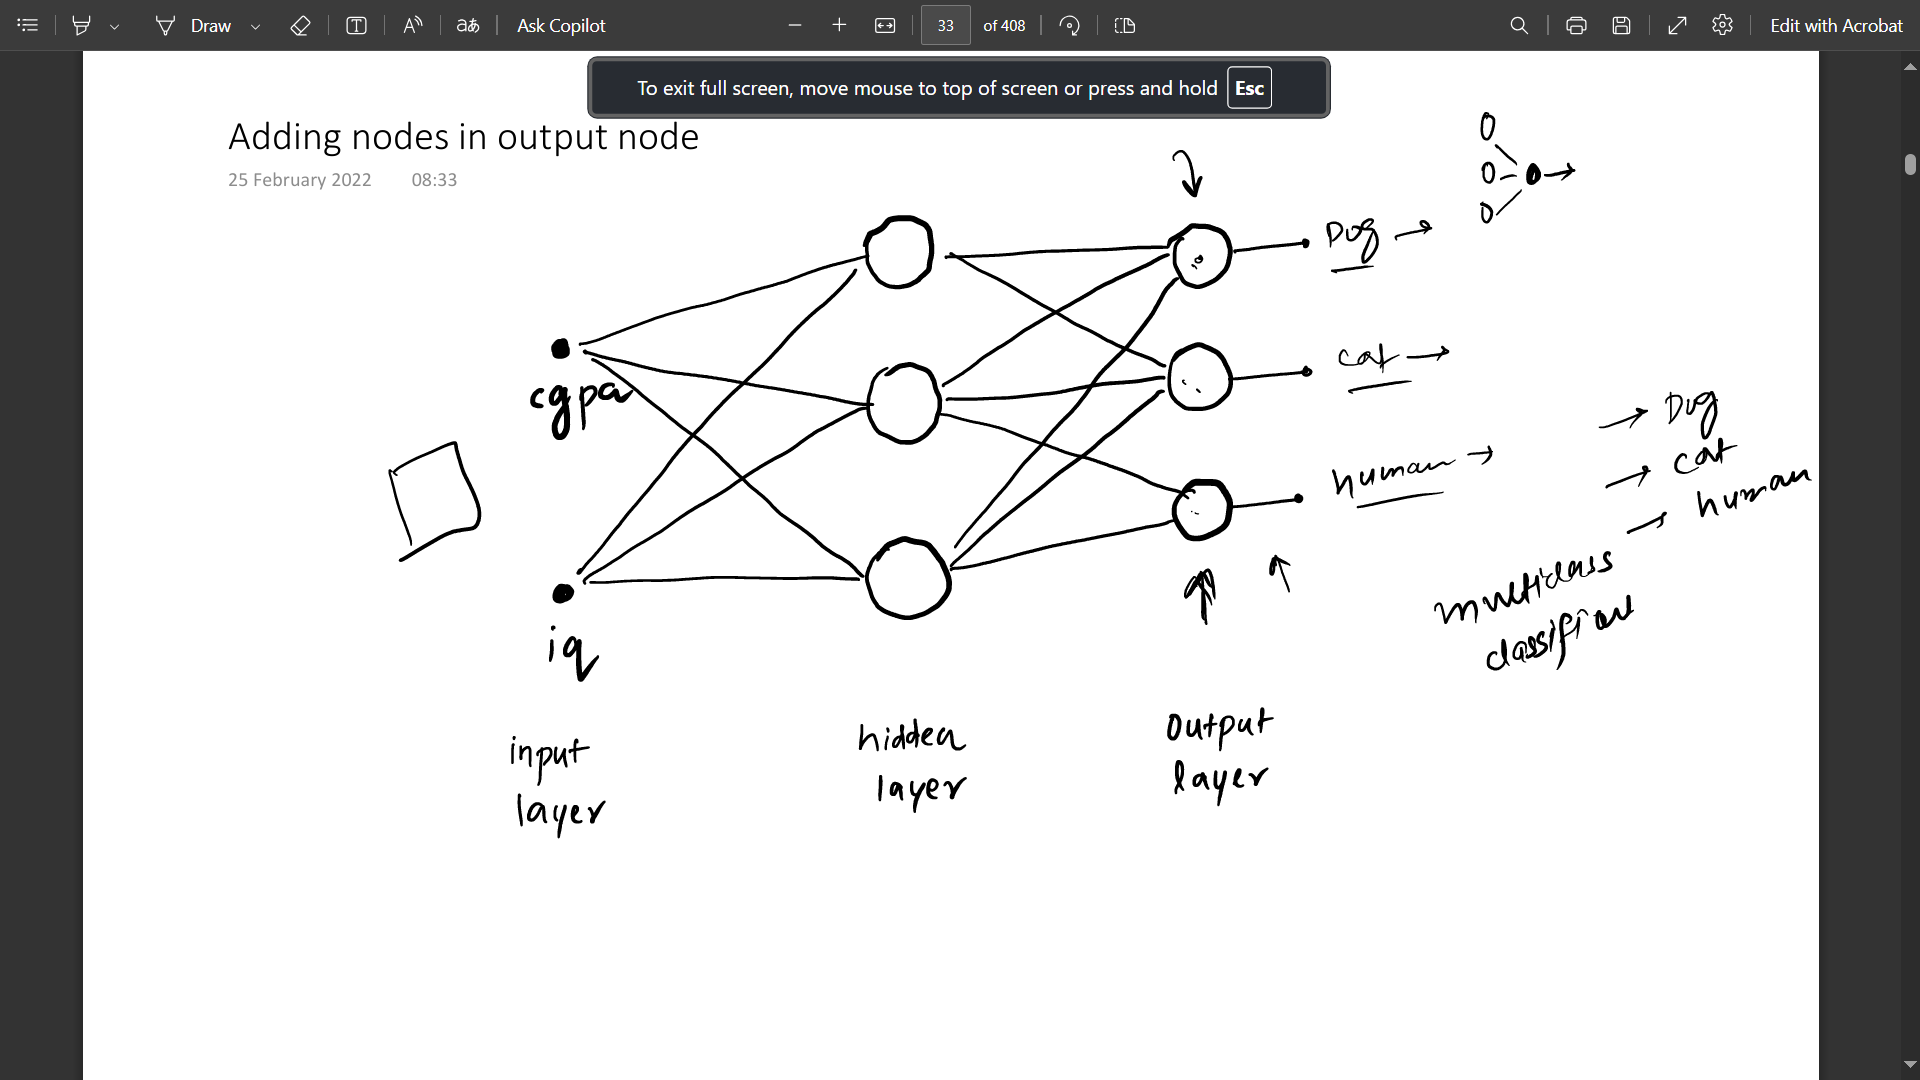

You can add multiple output layer. This is use for multi-class classification. In which it has higher probablity will be predicated as true.

we can increase the hidden layer also for more complex.

We can slove any mathamatical function from NN.

trainble parameter in MLP is weights and bias.

number of weight =number of previous * number of current node

number of bias= number of current node

**Denotation**

bij = bias, where i = layer number and j =node number

wij^k = weight, where k = entering layer, i= current layer which node number it is taken out, j = which layer node it is entering

oij= output, where i = layer and j = node number

# Forward Propagation

If we have input and we have weight and bias of neural network then to predict the output of that input we use forward propagation.

How NN predict?

-> linear algebra behind the scenes handle. we just need to understand the flow.

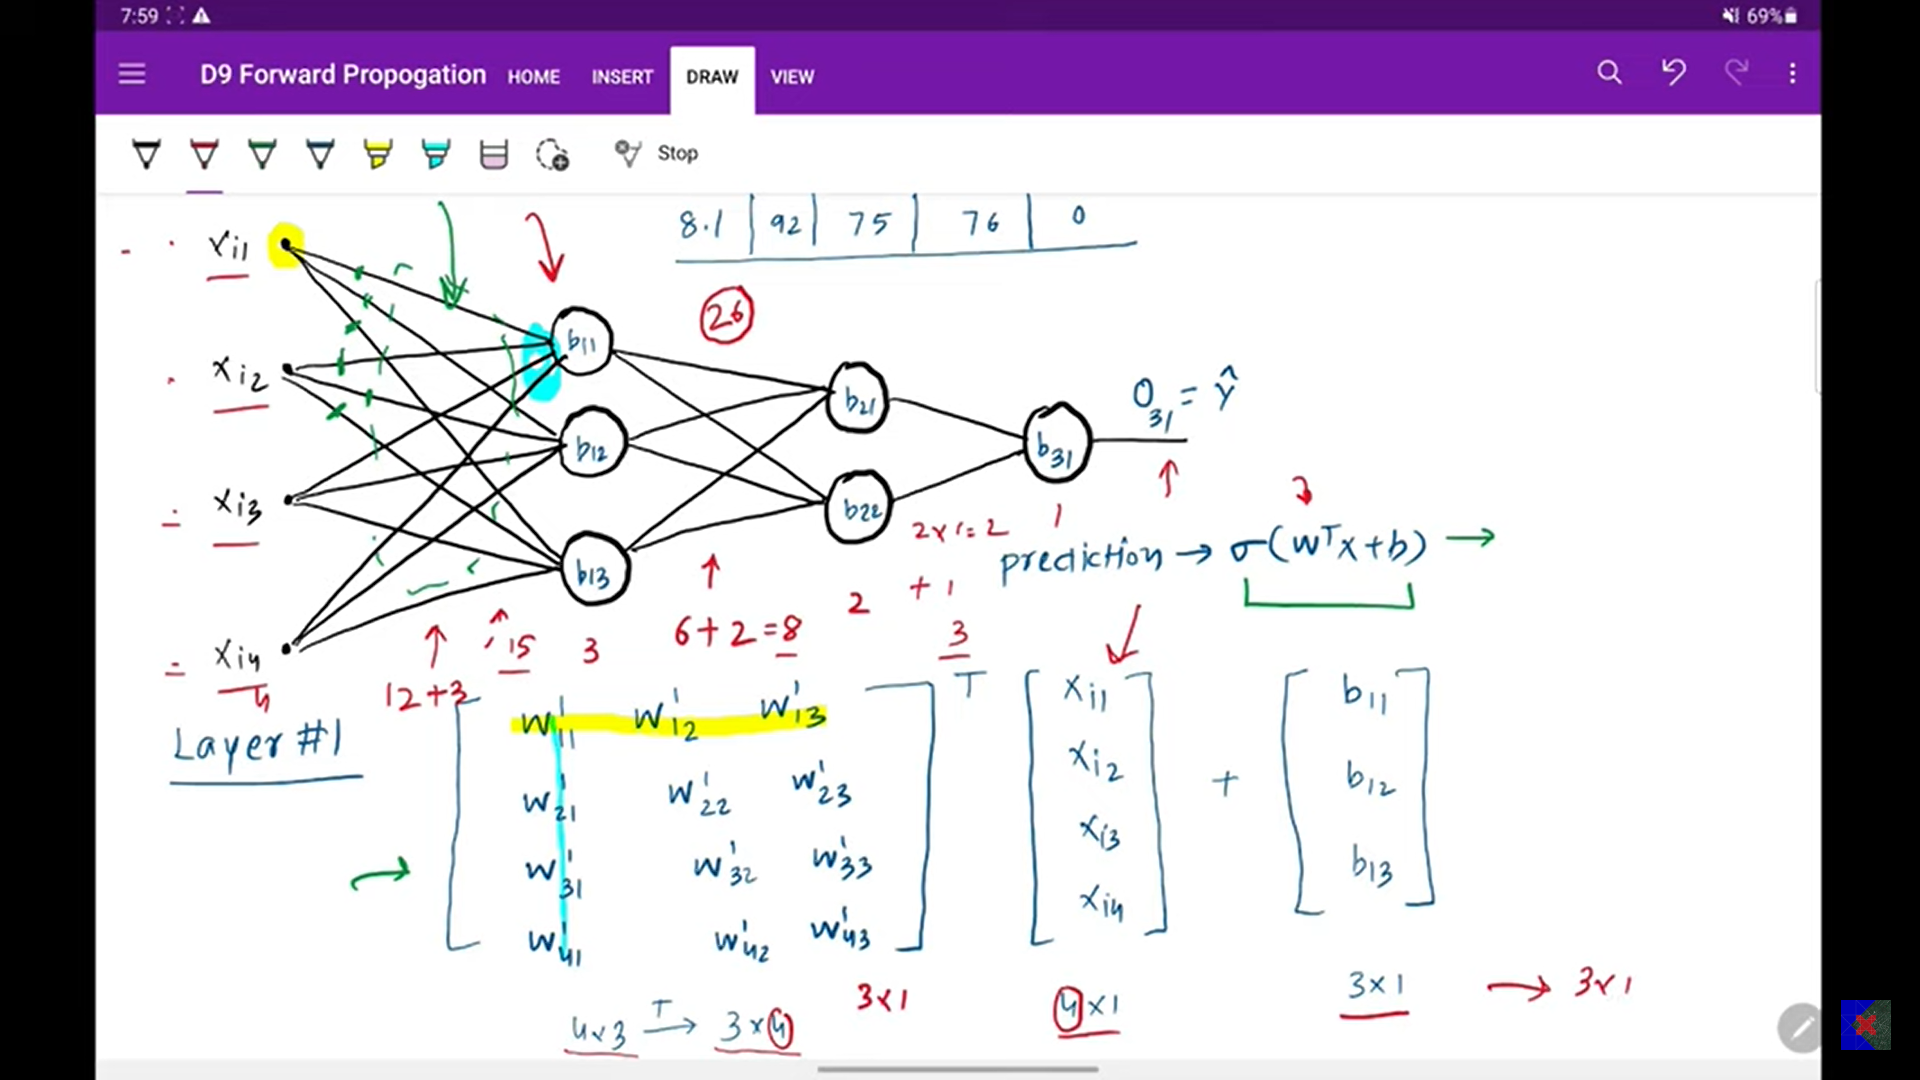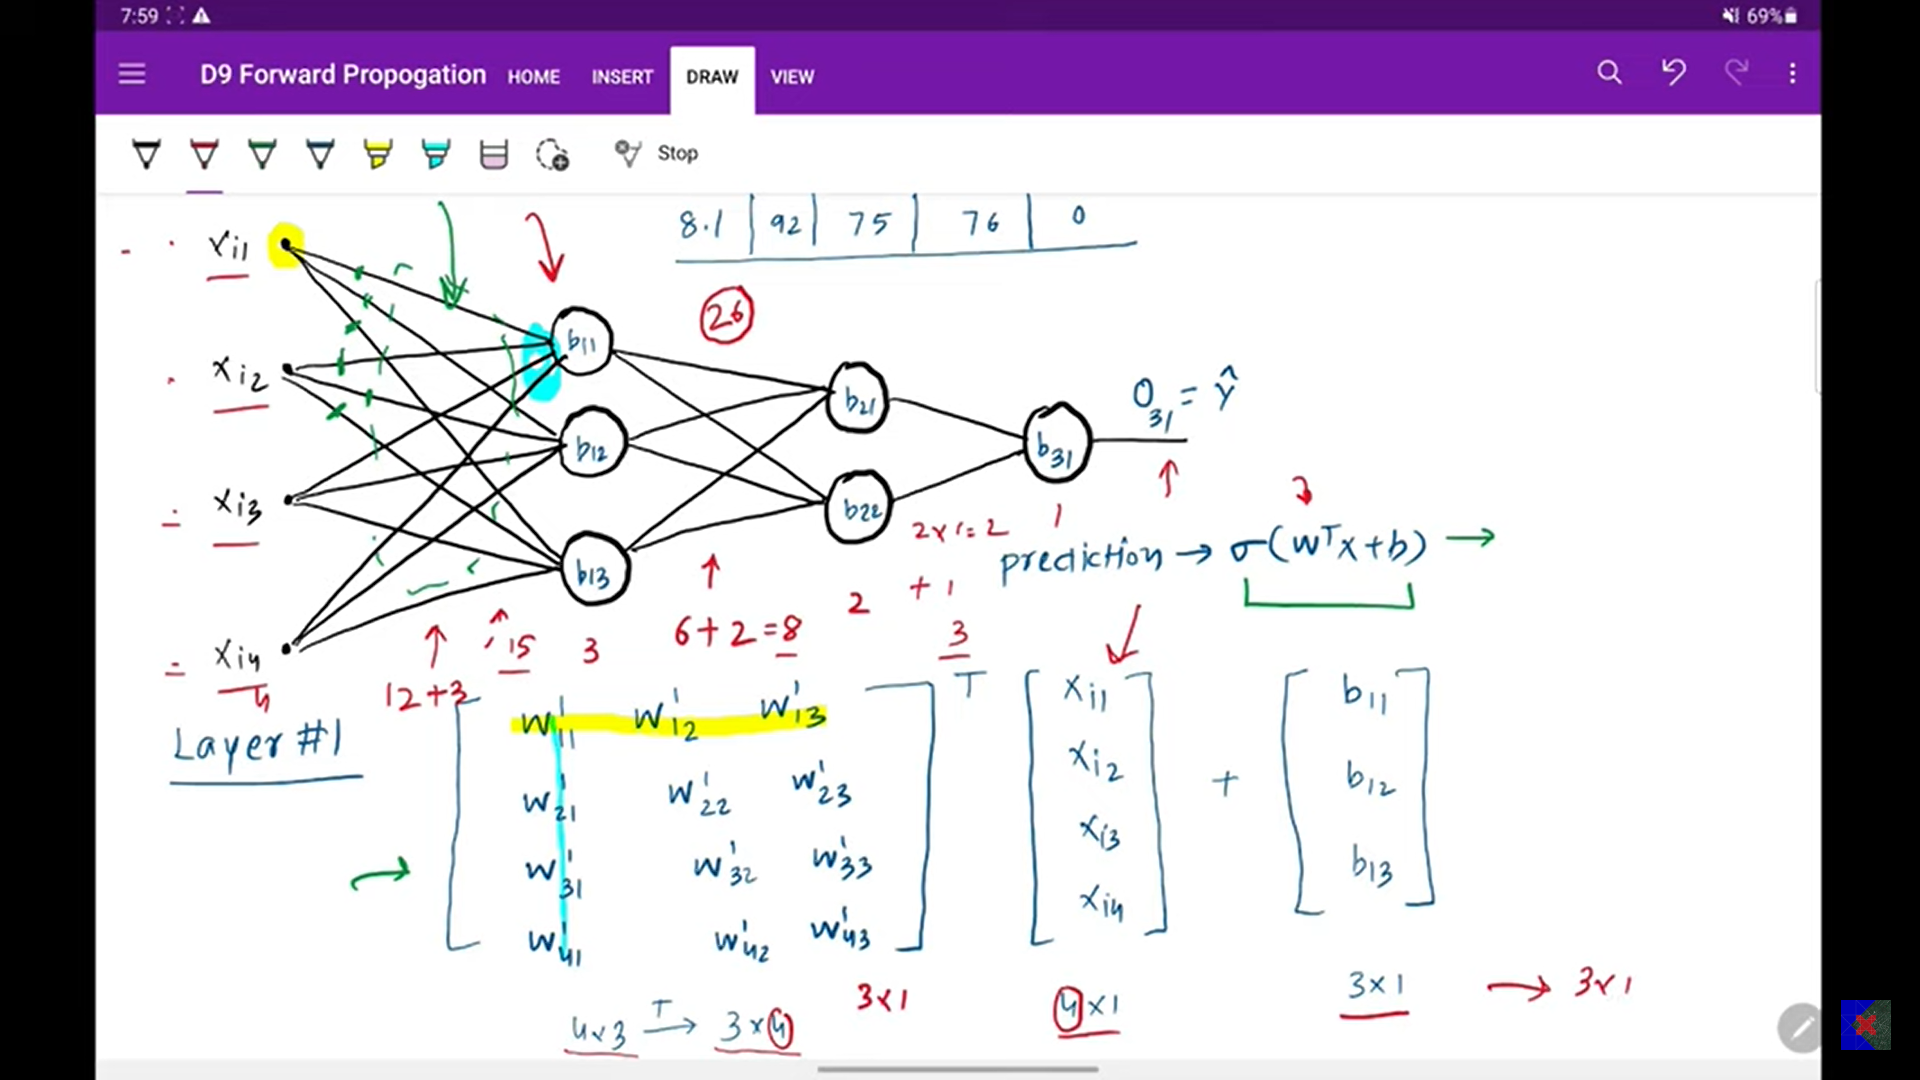

prediction = sigmoid(w^k X + b)

perdict = W ^T  X + B

T transpose.

in first layer

input = a^[0] , weight = w^[1], bias = b^[1]

output from first layer =a^[1] = sigmoid(a^[0] w^[1] + b^[1])

output from second layer =a^[2] = sigmoid(a^[1] w^[2] + b^[2])

output from third layer =a^[3] = sigmoid(a^[2] w^[3] + b^[3])

This

ouput = a^[3] = sigmoid(sigmoid(sigmoid(a^[0] w^[1] + b^[1])w^[2] + b^[2])w^[3] + b^[3])

